In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe"
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"),
        name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True),
        y=revenue_data_specific.Revenue.astype("float"),
        name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))


# ✅ Outside the function, no indentation
tesla = yf.Ticker("TSLA")
print(tesla.info)


{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [10]:
!pip install wget
import yfinance as yf
import pandas as pd

# Create ticker object
tesla = yf.Ticker("TSLA")

# Extract historical stock data with max period
tesla_data = tesla.history(period="max")

# Reset index so Date becomes a column
tesla_data.reset_index(inplace=True)

# Display first 5 rows
print(tesla_data.head())



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Get the HTML page (Revenue table)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text

# Step 2: Parse HTML
soup = BeautifulSoup(data, 'html.parser')

# Step 3: Create empty DataFrame for revenue
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 4: Locate the revenue table
table = soup.find("table")

# Loop through rows
for row in table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if len(col) < 2:  # skip bad rows
        continue
    
    date = col[0].text.strip()
    revenue = col[1].text.strip()
    
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
        "Date": [date], "Revenue": [revenue]
    })], ignore_index=True)

# Step 5: Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

print(tesla_revenue.tail())


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [7]:
!pip install wget
import yfinance as yf
import pandas as pd

# Create ticker object
GME = yf.Ticker("GME")

# Extract historical stock data with max period
gme_data = GME.history(period="max")

# Reset index so Date becomes a column
gme_data.reset_index(inplace=True)

# Display first 5 rows
print(gme_data.head(5))



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Get the HTML page (Revenue table)
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data = requests.get(url).text

# Step 2: Parse HTML
soup = BeautifulSoup(data, 'html.parser')

# Step 3: Create empty DataFrame for revenue
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 4: Locate the revenue table
table = soup.find("table")

# Loop through rows
for row in table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if len(col) < 2:  # skip bad rows
        continue
    
    date = col[0].text.strip()
    revenue = col[1].text.strip()
    
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({
        "Date": [date], "Revenue": [revenue]
    })], ignore_index=True)

# Step 5: Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

print(gme_revenue.tail())


    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


In [9]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


NameError: name 'make_graph' is not defined

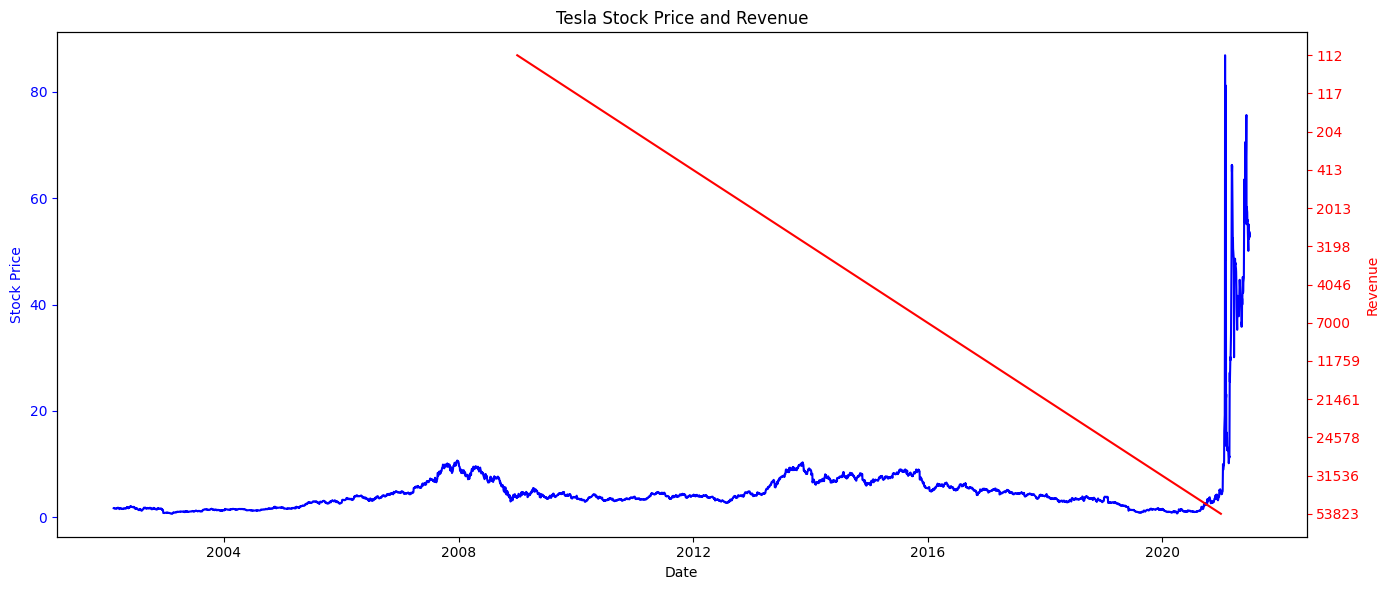

In [10]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    # Ensure date columns are in datetime format
    stock_data.reset_index(inplace=True)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock prices
    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-', label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='b')
    ax1.tick_params('y', colors='b')

    # Plot revenue data on second axis
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 'r-', label="Revenue")
    ax2.set_ylabel("Revenue", color='r')
    ax2.tick_params('y', colors='r')

    plt.title(stock + " Stock Price and Revenue")
    fig.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')


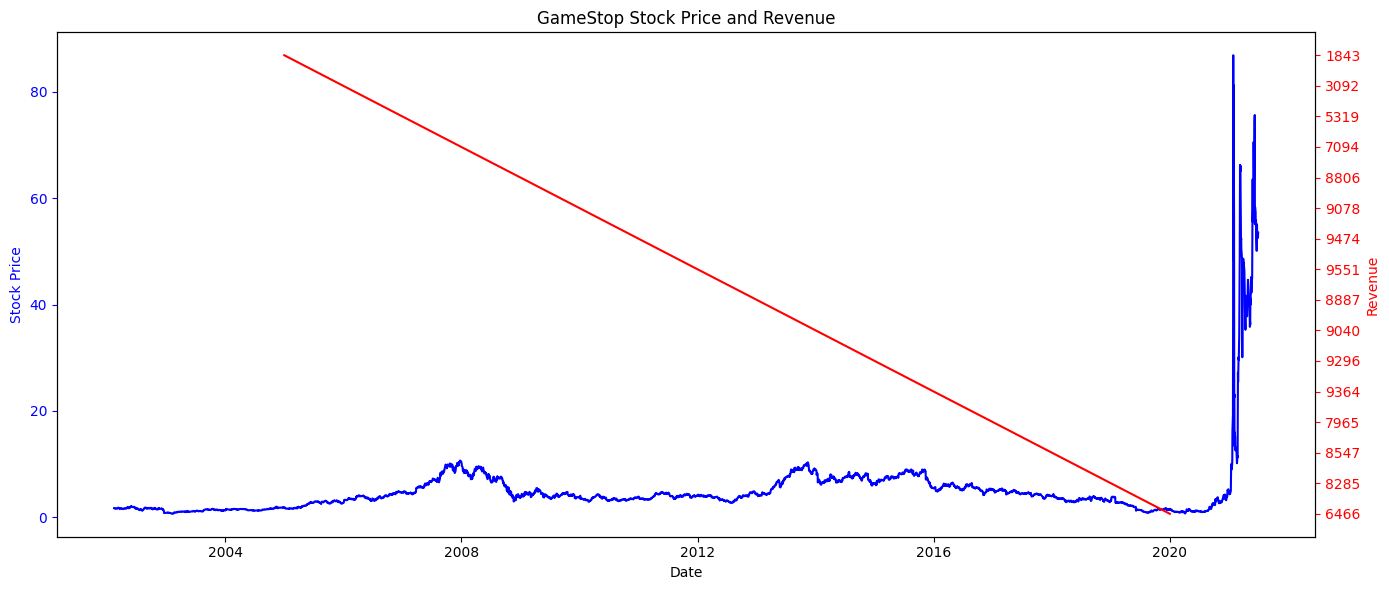

In [11]:
make_graph(gme_data, gme_revenue, 'GameStop')